In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, binom, norm
import scipy.stats as stats

# Autoreload of the files
%load_ext autoreload
%autoreload 2

In [3]:
path = '/Users/gaspardvilla/Local/NAT/nat_ada'
# Create the data folder if it doesn't exist
os.makedirs(path, exist_ok=True)
os.makedirs(f"{path}/slides_images", exist_ok=True)
os.makedirs(f"{path}/slides_images/19_05_2025", exist_ok=True)

# Sigmoid function
***

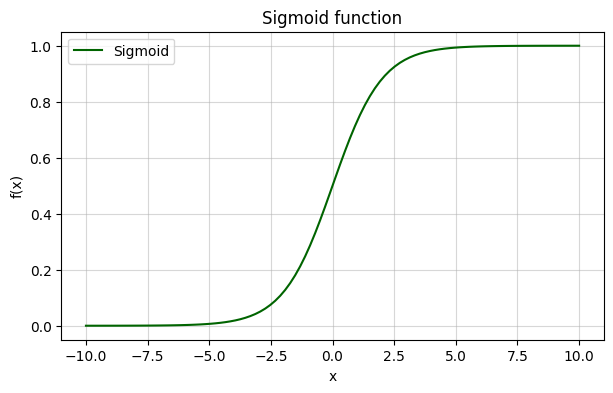

In [25]:
# Plot sigmoid function
plt.figure(figsize=(7, 4))
plt.plot(np.linspace(-10, 10, 100), 1 / (1 + np.exp(-np.linspace(-10, 10, 100))), c='darkgreen')
plt.title('Sigmoid function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.5)
plt.legend(['Sigmoid'])
plt.savefig(f'{path}/slides_images/21_05_2025/sigmoid.png')
plt.show()

# Digits data set
***

In [4]:
# Load digits dataset
from sklearn.datasets import load_digits
digits = load_digits()

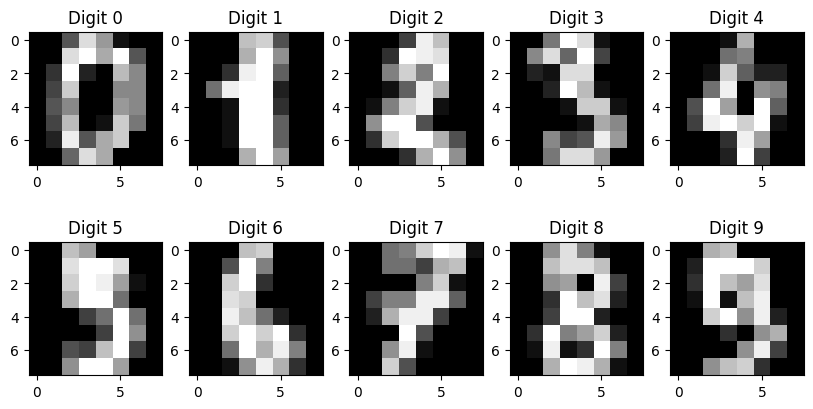

In [14]:
# Plot digits examples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Digit {i}')
plt.savefig(f'{path}/slides_images/21_05_2025/digits.png')
plt.show()

# SVM
***

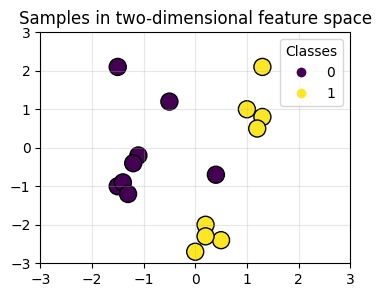

In [58]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array(
    [
        [0.4, -0.7],
        [-1.5, -1.0],
        [-1.4, -0.9],
        [-1.3, -1.2],
        [-1.1, -0.2],
        [-1.2, -0.4],
        [-0.5, 1.2],
        [-1.5, 2.1],
        [1.0, 1.0],
        [1.3, 0.8],
        [1.2, 0.5],
        [0.2, -2.0],
        [0.5, -2.4],
        [0.2, -2.3],
        [0.0, -2.7],
        [1.3, 2.1],
    ]
)

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Plotting settings
fig, ax = plt.subplots(figsize=(4, 3))
x_min, x_max, y_min, y_max = -3, 3, -3, 3
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
plt.grid(True, alpha=0.3)
plt.savefig(f'{path}/slides_images/21_05_2025/svm.png')
plt.show()

In [59]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True
):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

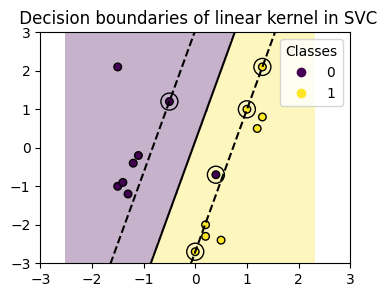

In [60]:
plot_training_data_with_decision_boundary("linear")
plt.savefig(f'{path}/slides_images/21_05_2025/svm_linear.png')

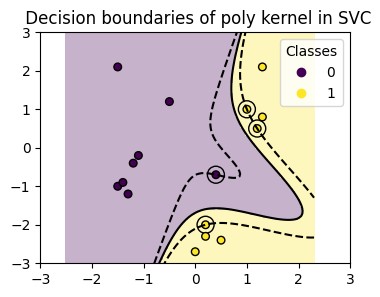

In [61]:
plot_training_data_with_decision_boundary("poly")
plt.savefig(f'{path}/slides_images/21_05_2025/svm_poly.png')

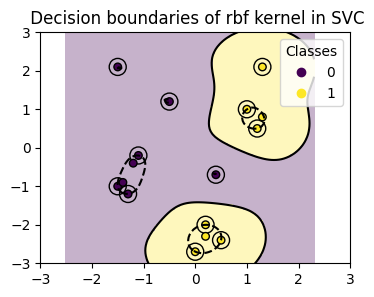

In [62]:
plot_training_data_with_decision_boundary("rbf")
plt.savefig(f'{path}/slides_images/21_05_2025/svm_rbf.png')

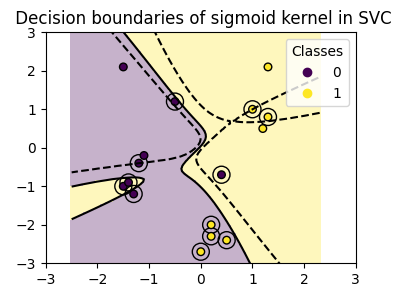

In [63]:
plot_training_data_with_decision_boundary("sigmoid")
plt.savefig(f'{path}/slides_images/21_05_2025/svm_sigmoid.png')

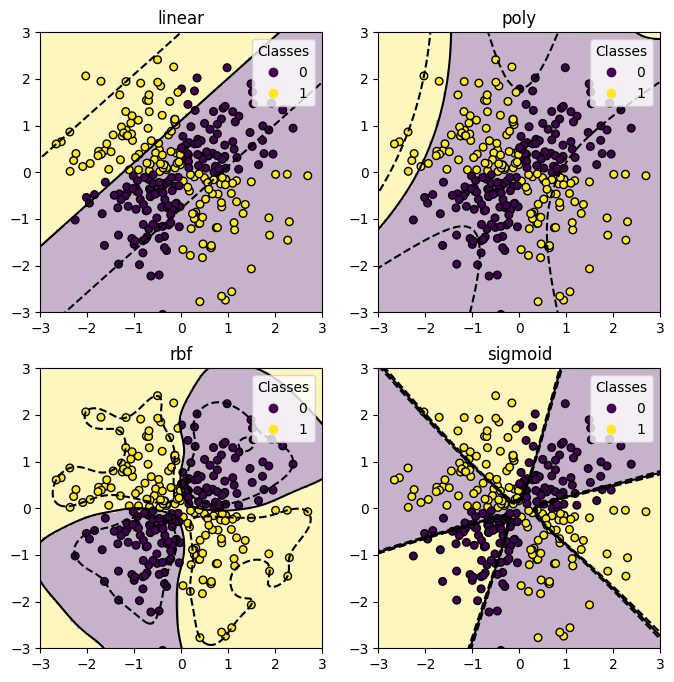

In [64]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

_, ax = plt.subplots(2, 2, figsize=(8, 8))
args = dict(long_title=False, support_vectors=False)
plot_training_data_with_decision_boundary("linear", ax[0, 0], **args)
plot_training_data_with_decision_boundary("poly", ax[0, 1], **args)
plot_training_data_with_decision_boundary("rbf", ax[1, 0], **args)
plot_training_data_with_decision_boundary("sigmoid", ax[1, 1], **args)
plt.savefig(f'{path}/slides_images/21_05_2025/svm_all.png')
plt.show()